In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

root_path = './20news-bydate/20news-bydate-train/'
root_path_test = './20news-bydate/20news-bydate-test/'
categories = os.listdir(root_path)
categories_test = os.listdir(root_path_test)
categories.remove('.DS_Store')
# categories_test.remove('.DS_Store')

In [3]:
data_test = []
for cat in categories_test:
    files = os.listdir(root_path_test + cat)
    for file in files:
        try:
            with open(root_path_test + cat + '/' + file,'rb') as f:
                data_test.append((f.read(),cat))
        except:
            print(cat,'passed', file)

In [4]:
data = []
for cat in categories:
    files = os.listdir(root_path + cat)
    for file in files:
        try:
            with open(root_path + cat + '/' + file,'rb') as f:
                data.append((f.read(),cat))
        except:
            print(cat,'passed', file)

In [5]:
# load test data

In [6]:
len(data_test)

7532

In [7]:
df = pd.DataFrame(data,columns=['col_text','col_class'])
df_test = pd.DataFrame(data_test,columns=['col_text','col_class'])

In [8]:
df['col_text'] = df['col_text'].apply(lambda x: x.decode('ISO-8859-1'))
df_test['col_text'] = df_test['col_text'].apply(lambda x: x.decode('ISO-8859-1'))

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [10]:
df.head()

,col_text,col_class
0,From: pcarmack@gimp.kpc.com (Phil Carmack)\nSu...,comp.os.ms-windows.misc
1,From: jbulf@balsa.Berkeley.EDU (Jeff Bulf)\nSu...,comp.graphics
2,From: fcrary@ucsu.Colorado.EDU (Frank Crary)\n...,talk.politics.guns
3,From: keith@radio.nl.nuwc.navy.mil\nSubject: T...,misc.forsale
4,From: lotto@laura.harvard.edu (Jerry Lotto)\nS...,rec.motorcycles


## data preprocessing

In [11]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

Steps :
1. create a vocab using all words in the text.
2. one-hot encode the text.
3. one- hot encode class.
4. we can use stemming, lemmatization, stopwords removal etc but we'll ignore them for now.

In [12]:
import string
sw = sw 

In [13]:
df['col_text'] = df['col_text'].str.lower()
df['col_text'] = df['col_text'].str.replace(r'[^\w\s]+','')
df['col_text']=df['col_text'].str.replace('\n',' ')
df['col_text']=df['col_text'].str.replace('\t',' ')
df['col_text'] = df['col_text'].apply(lambda x: '' if x in sw else x)

In [14]:
df_test['col_text'] = df_test['col_text'].str.lower()
df_test['col_text'] = df_test['col_text'].str.replace(r'[^\w\s]+','')
df_test['col_text']=df_test['col_text'].str.replace('\n',' ')
df_test['col_text']=df_test['col_text'].str.replace('\t',' ')
df_test['col_text'] = df_test['col_text'].apply(lambda x: '' if x in sw else x)

In [15]:
import re

In [16]:
df['col_text'] = df['col_text'].apply(lambda x: ' '.join(['<number>' if elem.isdigit() is True else elem for elem in x.split(' ') ]) )
df_test['col_text'] = df_test['col_text'].apply(lambda x: ' '.join(['<number>' if elem.isdigit() is True else elem for elem in x.split(' ') ]) )


In [17]:
full_text = df['col_text'].sum()

In [18]:
full_text = [wrd for wrd in full_text.lower().split(' ') if wrd not in sw]

In [19]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('stopwords')

In [20]:
from collections import Counter
wrd_cnt = Counter(full_text)

In [21]:
vocab  = [elem[0] for elem in wrd_cnt.most_common(4000)]
vocab = vocab[1:]

### Multivariabte Bernoulli Naive Bayes

#### To use bernoulli naive bayes we need to make a few assumptions :
1. Each feature can only take two values 0 or 1 i.e absence or presence of a word is used as feature.
2. class conditional independence of features.


### 1. Maximum likelihood estimate

In [22]:
df['col_class'].shape

(11314,)

In [23]:
# 1000 features
# 20 classes
# 11314 examples

In [24]:
# empirical prior probability of each category
prob_y = (df['col_class'].value_counts()/df.shape[0]).to_dict()

In [25]:
for i,elem in enumerate(vocab):
    try:
        df[elem] = df['col_text'].str.contains(elem)
    except:
        print('skipped', elem)
        pass

In [26]:
for i,elem in enumerate(vocab):
    try:
        df_test[elem] = df_test['col_text'].str.contains(elem)
    except:
        pass

In [27]:
df.head()

,col_text,col_class,<number>,subject,lines,organization,would,one,writes,article,...,informed,nh,germans,angle,giants,barry,stewart,helping,gift,amanda
0,from pcarmackgimpkpccom phil carmack subject r...,comp.os.ms-windows.misc,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,from jbulfbalsaberkeleyedu jeff bulf subject r...,comp.graphics,True,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,from fcraryucsucoloradoedu frank crary subject...,talk.politics.guns,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,from keithradionlnuwcnavymil subject tektronix...,misc.forsale,True,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,from lottolauraharvardedu jerry lotto subject ...,rec.motorcycles,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_test.head()

,col_text,col_class,<number>,subject,lines,organization,would,one,writes,article,...,informed,nh,germans,angle,giants,barry,stewart,helping,gift,amanda
0,from punjabilelandstanfordedu sanjeev punjabi ...,rec.sport.baseball,True,True,True,True,True,False,True,True,...,False,False,False,False,True,True,False,False,False,False
1,from ptreibistromathmitreorg peter trei subjec...,soc.religion.christian,True,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,from galvintcsnpsnavymil thomas galvin subject...,rec.sport.hockey,True,True,True,True,True,True,True,True,...,False,True,False,True,False,False,False,False,False,False
3,from gradynetcomcom 10162ef221 subject re tran...,sci.crypt,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,from jrmelmcircaufledu jeff mason subject jeff...,misc.forsale,True,True,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [29]:
n_class = df['col_class'].value_counts().to_dict()

In [30]:
df_probs = df.groupby('col_class').sum()

In [31]:
df_probs = df_probs.drop(df_probs.std()[(df_probs.std() <= 0.01)].index, axis=1)

In [32]:
for elem in list(df_probs.index):
    df_probs.loc[elem] =  df_probs.loc[elem]/n_class[elem]

In [33]:
df_probs.head()

,<number>,subject,lines,organization,would,one,writes,article,people,dont,...,informed,nh,germans,angle,giants,barry,stewart,helping,gift,amanda
col_class,,,,,,,,,,,,,,,,,,,,,
alt.atheism,1.000000,1.0,1.000000,0.943750,0.454167,0.716667,0.812500,0.625000,0.410417,0.452083,...,0.008333,0.141667,0.016667,0.022917,0.000000,0.000000,0.000000,0.020833,0.008333,0.0
comp.graphics,1.000000,1.0,1.000000,0.958904,0.340753,0.606164,0.332192,0.315068,0.058219,0.205479,...,0.003425,0.056507,0.000000,0.032534,0.000000,0.003425,0.003425,0.005137,0.003425,0.0
comp.os.ms-windows.misc,1.000000,1.0,0.996616,0.971235,0.252115,0.600677,0.385787,0.365482,0.076142,0.225042,...,0.003384,0.091371,0.000000,0.003384,0.001692,0.003384,0.000000,0.001692,0.005076,0.0
comp.sys.ibm.pc.hardware,0.998305,1.0,0.996610,0.977966,0.355932,0.691525,0.330508,0.306780,0.084746,0.235593,...,0.003390,0.076271,0.000000,0.010169,0.000000,0.006780,0.000000,0.001695,0.000000,0.0
comp.sys.mac.hardware,1.000000,1.0,0.998270,0.953287,0.349481,0.712803,0.371972,0.351211,0.108997,0.264706,...,0.003460,0.062284,0.000000,0.006920,0.000000,0.005190,0.000000,0.001730,0.000000,0.0


In [34]:
df_test = df_test.set_index('col_class',drop=True)

In [35]:
df_test1 = df_test.drop(np.setdiff1d(df_test.columns,df_probs.columns),axis=1)

In [36]:
import operator
y_pred = []
for i in range(df_test1.shape[0]):
    ans={}
    for elem in df_probs.index: # for each class
        blah = np.sum((df_test1.iloc[i]*np.log(df_probs.loc[elem])) + ((1-df_test1.iloc[i]) * np.log(1-df_probs.loc[elem])))
        prob = np.log(prob_y[elem]) + blah
        ans[elem]=prob
    y_pred.append(max(ans.items(), key=operator.itemgetter(1))[0])
    del ans

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df_test1.head()

,<number>,subject,lines,organization,would,one,writes,article,people,dont,...,informed,nh,germans,angle,giants,barry,stewart,helping,gift,amanda
col_class,,,,,,,,,,,,,,,,,,,,,
rec.sport.baseball,True,True,True,True,True,False,True,True,False,True,...,False,False,False,False,True,True,False,False,False,False
soc.religion.christian,True,True,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
rec.sport.hockey,True,True,True,True,True,True,True,True,False,False,...,False,True,False,True,False,False,False,False,False,False
sci.crypt,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
misc.forsale,True,True,True,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [38]:
y_true = df_test1.index

In [39]:
res_df = pd.DataFrame({'y_true':y_true,'y_pred':y_pred})

In [40]:
res_df.head(10)

,y_true,y_pred
0,rec.sport.baseball,rec.sport.baseball
1,soc.religion.christian,talk.politics.misc
2,rec.sport.hockey,rec.sport.hockey
3,sci.crypt,sci.crypt
4,misc.forsale,misc.forsale
5,comp.graphics,comp.graphics
6,talk.politics.mideast,alt.atheism
7,misc.forsale,comp.sys.ibm.pc.hardware
8,comp.graphics,sci.electronics
9,talk.religion.misc,rec.motorcycles


In [41]:
res_df[res_df['y_true']==res_df['y_pred']]

,y_true,y_pred
0,rec.sport.baseball,rec.sport.baseball
2,rec.sport.hockey,rec.sport.hockey
3,sci.crypt,sci.crypt
4,misc.forsale,misc.forsale
5,comp.graphics,comp.graphics
...,...,...
7520,comp.sys.mac.hardware,comp.sys.mac.hardware
7524,talk.politics.guns,talk.politics.guns
7526,sci.electronics,sci.electronics
7528,sci.crypt,sci.crypt


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
import matplotlib.pyplot as plt

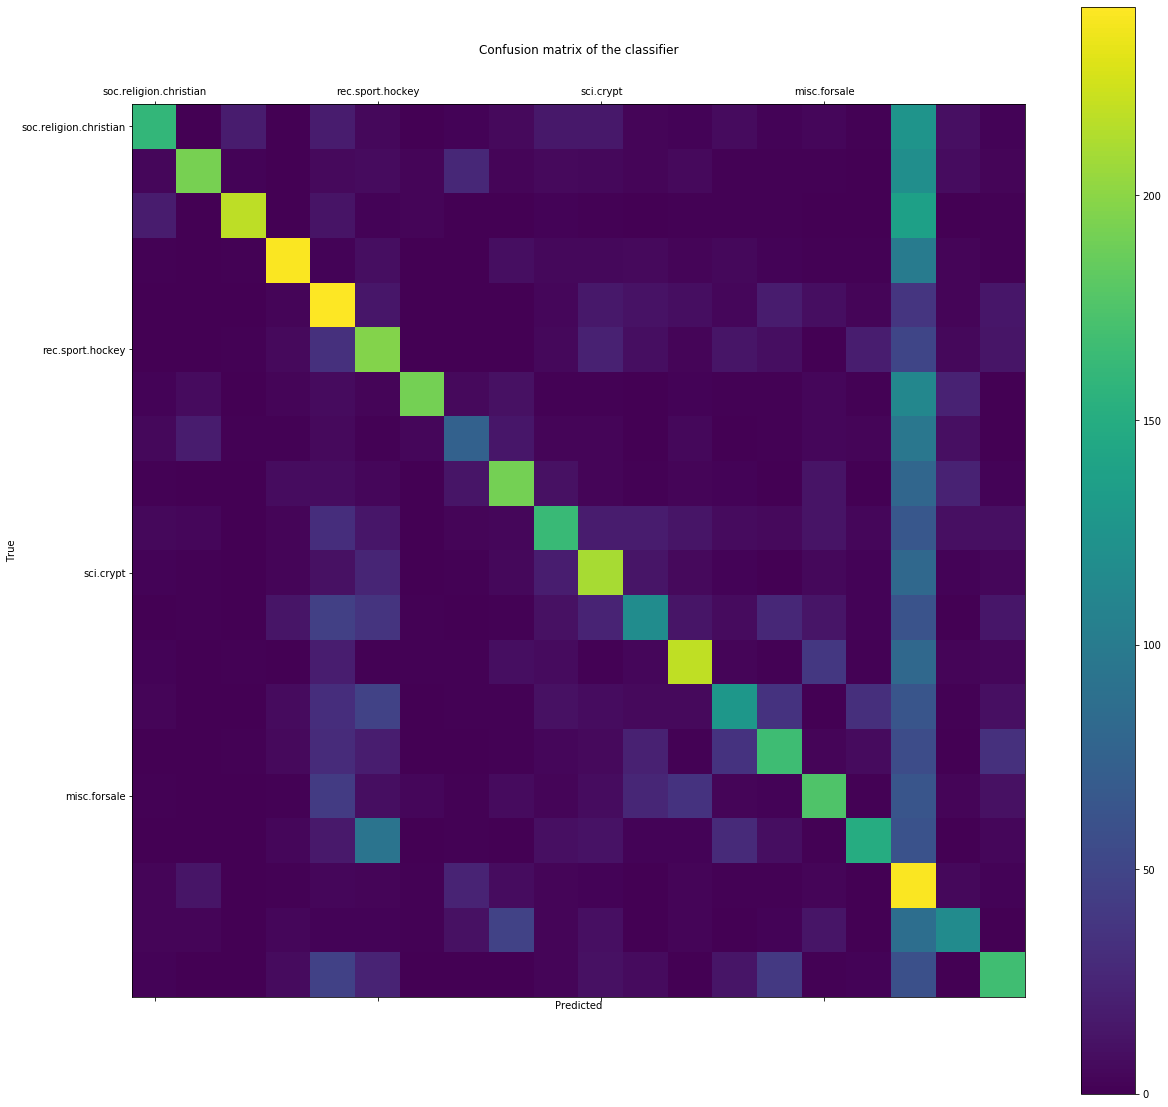

In [44]:
labels = res_df['y_true'].unique()
cm = confusion_matrix(y_true, y_pred, labels,normalize=True)
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
from sklearn.metrics import precision_score,recall_score

In [46]:
precision_score(y_true,y_pred, average='macro')

0.581524442079547

In [47]:
recall_score(y_true,y_pred, average='macro')

0.47191526511176224

In [48]:
cm = confusion_matrix(y_true, y_pred, labels,normalize='true')
pd.DataFrame(cm,columns=labels,index=labels)

,rec.sport.baseball,soc.religion.christian,rec.sport.hockey,sci.crypt,misc.forsale,comp.graphics,talk.politics.mideast,talk.religion.misc,talk.politics.guns,sci.med,sci.space,sci.electronics,rec.motorcycles,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,rec.autos,comp.windows.x,alt.atheism,talk.politics.misc,comp.sys.mac.hardware
rec.sport.baseball,0.403023,0.000000,0.045340,0.000000,0.045340,0.012594,0.000000,0.005038,0.015113,0.040302,0.040302,0.007557,0.005038,0.017632,0.005038,0.010076,0.002519,0.314861,0.025189,0.005038
soc.religion.christian,0.010050,0.482412,0.005025,0.000000,0.015075,0.017588,0.007538,0.067839,0.007538,0.015075,0.012563,0.007538,0.015075,0.002513,0.002513,0.002513,0.000000,0.301508,0.020101,0.007538
rec.sport.hockey,0.045113,0.000000,0.546366,0.000000,0.032581,0.005013,0.007519,0.000000,0.000000,0.005013,0.002506,0.000000,0.002506,0.002506,0.002506,0.000000,0.000000,0.345865,0.000000,0.002506
sci.crypt,0.002525,0.000000,0.002525,0.608586,0.005051,0.022727,0.000000,0.000000,0.022727,0.012626,0.012626,0.015152,0.007576,0.012626,0.005051,0.002525,0.002525,0.255051,0.007576,0.002525
misc.forsale,0.000000,0.000000,0.000000,0.007692,0.620513,0.038462,0.000000,0.000000,0.000000,0.010256,0.041026,0.030769,0.023077,0.010256,0.046154,0.023077,0.007692,0.094872,0.007692,0.038462
comp.graphics,0.000000,0.000000,0.002571,0.015424,0.087404,0.506427,0.000000,0.000000,0.000000,0.012853,0.056555,0.023136,0.007712,0.035990,0.023136,0.000000,0.048843,0.131105,0.012853,0.035990
talk.politics.mideast,0.005319,0.018617,0.000000,0.007979,0.018617,0.007979,0.507979,0.015957,0.029255,0.002660,0.002660,0.000000,0.005319,0.002660,0.002660,0.010638,0.002660,0.297872,0.061170,0.000000
talk.religion.misc,0.019920,0.071713,0.003984,0.003984,0.023904,0.003984,0.015936,0.298805,0.059761,0.011952,0.011952,0.000000,0.019920,0.000000,0.003984,0.015936,0.011952,0.382470,0.039841,0.000000
talk.politics.guns,0.002747,0.000000,0.000000,0.021978,0.021978,0.010989,0.000000,0.038462,0.524725,0.030220,0.008242,0.002747,0.008242,0.005495,0.000000,0.035714,0.000000,0.219780,0.063187,0.005495
sci.med,0.012626,0.010101,0.000000,0.007576,0.080808,0.037879,0.000000,0.007576,0.010101,0.414141,0.045455,0.045455,0.035354,0.017677,0.015152,0.032828,0.010101,0.166667,0.025253,0.025253


1. With a simple naive bayes solution using < 1% of the unique words by frequency as feature we can achieve ~51% total accuracy, precision and recall.

Inspite of these very naive choices - 
1. Using only 1000 most frequent words i.e we're ignoring the rare words that actually define a class but using mostly common words as features which makes the problem harder.
2. Ignoring word count per document.
3. Ignoring word burstiness.
4. class conditional feature independence.
5. Empirical prior rather etc.

Our model vastly surpassed random guessing(5% accuracy).
Next step is to use some sorting of screening/ranking method to filter out words that are most discriminative. There are two main algorithms that I'm going to try next.


### Use mutual information to screen features